Dataset: https://www.kaggle.com/datasets/youssefaboelwafa/clustering-penguins-species

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('penguins.csv')

In [3]:
data.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


In [6]:
print('number of data points:', data.shape[0])

number of data points: 344


In [9]:
print('missing values:\n', data.isnull().sum())

missing values:
 culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
sex                  9
dtype: int64


In [10]:
data = data.dropna()

In [11]:
print('number of data points after missing values are dropped:', data.shape[0])

number of data points after missing values are dropped: 335


In [13]:
data['sex'].value_counts()

MALE      169
FEMALE    165
.           1
Name: sex, dtype: int64

In [14]:
data = data[data['sex'] != '.']
data['sex'].value_counts()

MALE      169
FEMALE    165
Name: sex, dtype: int64

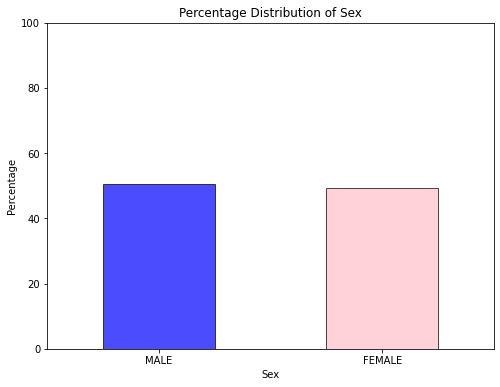

In [16]:
sex_counts = data['sex'].value_counts(normalize=True) * 100
plt.figure(figsize=(8, 6))
sex_counts.plot(kind='bar', color=['blue', 'pink'], alpha=0.7, edgecolor='black')
plt.title('Percentage Distribution of Sex')
plt.ylabel('Percentage')
plt.xlabel('Sex')
plt.xticks(rotation=0)
plt.ylim(0, 100)
plt.show()

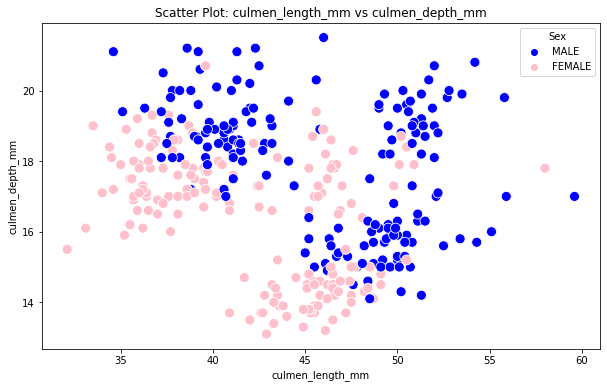

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='culmen_length_mm', y='culmen_depth_mm', hue='sex', palette=['blue', 'pink'], s=100)
plt.title('Scatter Plot: culmen_length_mm vs culmen_depth_mm')
plt.xlabel('culmen_length_mm')
plt.ylabel('culmen_depth_mm')
plt.legend(title='Sex')
plt.show()

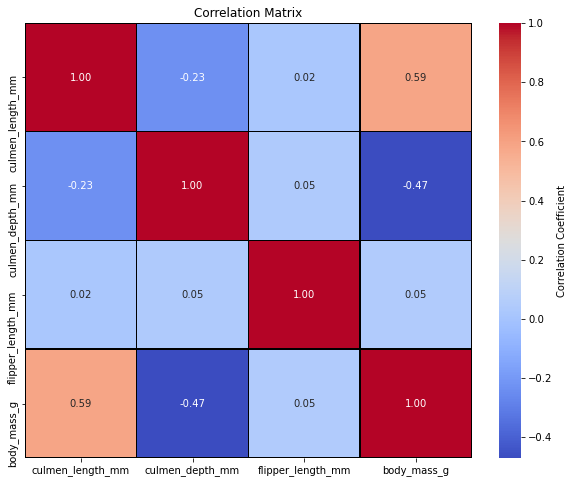

In [20]:
correlation_matrix = data.select_dtypes(include=['float64', 'int64']).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True,
            fmt=".2f", cmap="coolwarm",
            cbar_kws={'label': 'Correlation Coefficient'},
            linewidths=0.5, linecolor='black')
plt.title('Correlation Matrix')
plt.show()

In [25]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['sex'] = label_encoder.fit_transform(data['sex'])

In [26]:
data.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,1
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0
4,36.7,19.3,193.0,3450.0,0
5,39.3,20.6,190.0,3650.0,1


In [32]:
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import numpy as np

In [33]:
x = data[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']]

In [34]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [36]:
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(x_scaled)
    inertia.append(kmeans.inertia_)

In [29]:
inertia = []
k_values = range(1, 10)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)
    inertia.append(kmeans.inertia_)

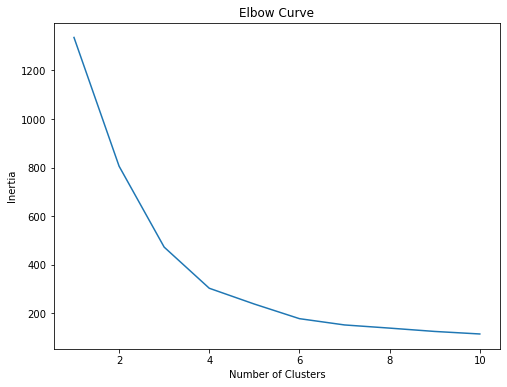

In [37]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia)
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [38]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans.fit(x_scaled)

KMeans(n_clusters=4, n_init=10, random_state=42)

In [39]:
data['cluster'] = kmeans.labels_

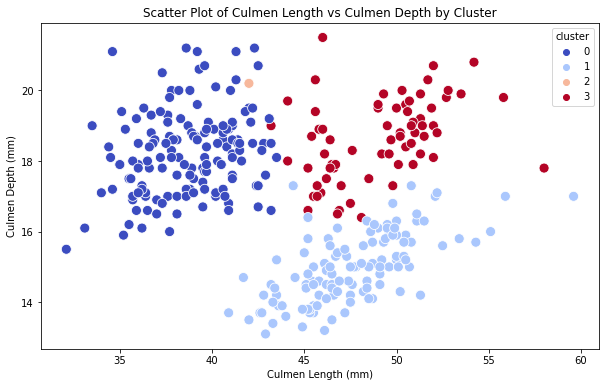

In [43]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='culmen_length_mm', y='culmen_depth_mm', hue='cluster', palette='coolwarm', s=100)
plt.title('Scatter Plot of Culmen Length vs Culmen Depth by Cluster')
plt.xlabel('Culmen Length (mm)')
plt.ylabel('Culmen Depth (mm)')
plt.show()

In [48]:
x = data[['culmen_length_mm']].values
y = data['culmen_depth_mm'].values

In [49]:
linear_regressor = LinearRegression()
linear_regressor.fit(x, y)
y_pred = linear_regressor.predict(x)

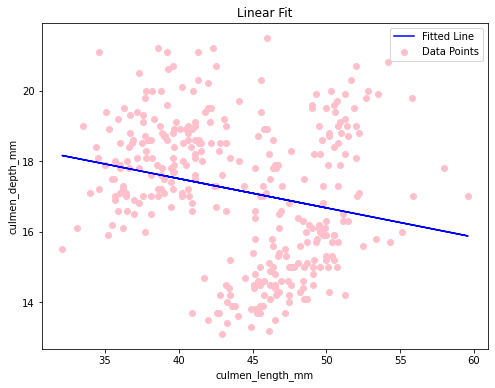

In [51]:
plt.figure(figsize=(8, 6))
plt.scatter(data['culmen_length_mm'], data['culmen_depth_mm'], color='pink', label='Data Points')
plt.plot(data['culmen_length_mm'], y_pred, color='blue', label='Fitted Line')
plt.title('Linear Fit')
plt.xlabel('culmen_length_mm')
plt.ylabel('culmen_depth_mm')
plt.legend()
plt.show()